In [47]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns



In [48]:
# Display settings
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(style="whitegrid")

In [49]:
df = pd.read_csv('onlinefraud.csv')
df.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.00,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.00,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0,0


In [50]:
df.shape

(6362620, 11)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [52]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


Understanding the Dataset


To identify online payment fraud using machine learning, we need to train a model to classify transactions as fraudulent or non-fraudulent. This requires a dataset containing information about online payment fraud, which helps us understand the characteristics of fraudulent transactions.

Dataset Columns


The dataset used in this analysis contains the following columns:

Transaction Information
- step: represents a unit of time, where 1 step equals 1 hour
- type: type of online transaction
- amount: the amount of the transaction

Originator Information
- nameOrig: customer starting the transaction
- oldbalanceOrg: balance before the transaction
- newbalanceOrig: balance after the transaction

Recipient Information
- nameDest: recipient of the transaction
- oldbalanceDest: initial balance of recipient before the transaction
- newbalanceDest: the new balance of recipient after the transaction

Fraud Label
- isFraud: indicates whether the transaction is fraudulent (1) or not (0)


In [53]:
# Feature engineering 
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig'] 
df['balanceDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest']

In [54]:
df.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,9839.64,0.00
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,1864.28,0.00
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,181.00,0.00
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,181.00,-21182.00
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,11668.14,0.00
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,0,7817.71,0.00
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0,0,7107.77,0.00
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.00,0.00,0,0,7861.64,0.00
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.00,0.00,0,0,2671.00,0.00
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0,0,5337.77,-1549.21


In [55]:
df.isnull().sum()

step               0
type               0
amount             0
nameOrig           0
oldbalanceOrg      0
newbalanceOrig     0
nameDest           0
oldbalanceDest     0
newbalanceDest     0
isFraud            0
isFlaggedFraud     0
balanceDiffOrig    0
balanceDiffDest    0
dtype: int64

#EDA

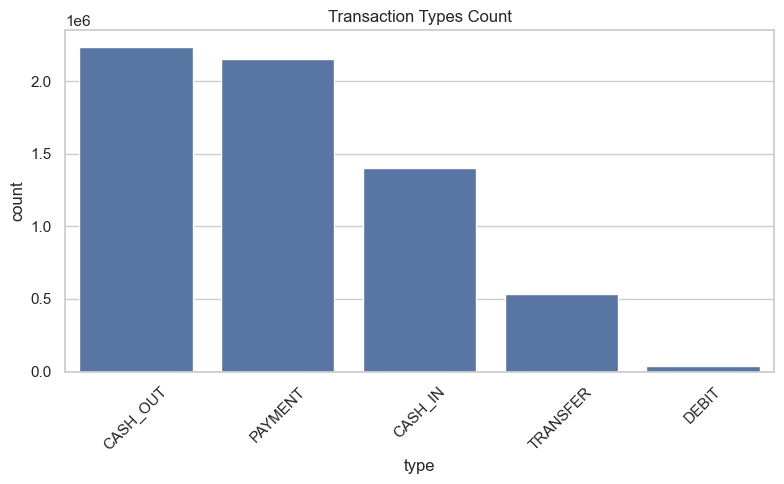

In [56]:
# Distribution of Transaction Types
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index)
plt.title('Transaction Types Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 1. **Transaction Type Distribution**
- The most frequent transaction types are:
  - `CASH_OUT` and `PAYMENT` – each over 2 million occurrences.
  - Followed by `CASH_IN` and `TRANSFER`.
  - `DEBIT` is extremely rare.

**💡Focus fraud detection models and rules on `CASH_OUT` and `TRANSFER`, as they dominate the transaction flow**.

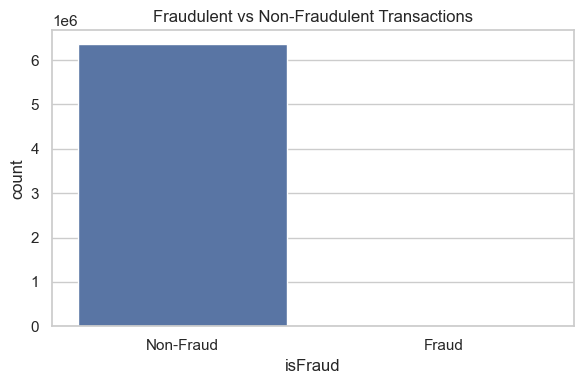

In [57]:
# Fraud vs Non-Fraud count
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='isFraud')
plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.tight_layout()
plt.show()

### 2. **Fraud vs Non-Fraud Count**
- Fraudulent transactions are **extremely rare** compared to non-fraudulent ones.
- Class imbalance is significant — with only a **tiny fraction labeled as fraud**.

**💡This imbalance will require special handling (e.g., resampling, anomaly detection) to avoid bias in predictive models.**

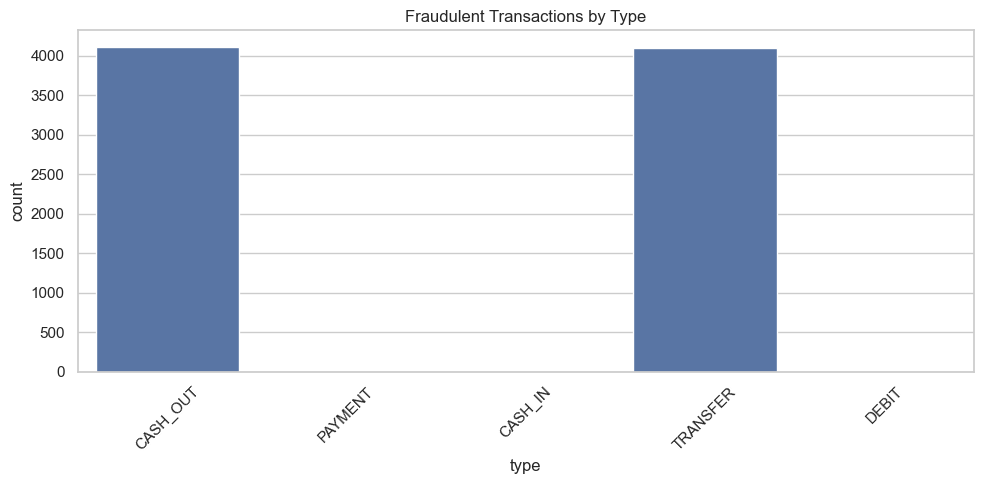

In [58]:
# Fraud Distribution by Transaction Type
plt.figure(figsize=(10, 5))
sns.countplot(data=df[df['isFraud'] == 1], x='type', order=df['type'].value_counts().index)
plt.title('Fraudulent Transactions by Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3. **Fraud Distribution by Transaction Type**
- All fraudulent activity occurs within:
  - `CASH_OUT`
  - `TRANSFER`
- Other types (`PAYMENT`, `CASH_IN`, `DEBIT`) show **zero fraud cases**.

**💡For real-time fraud prevention, only transactions of type `CASH_OUT` and `TRANSFER` need monitoring for fraud.**

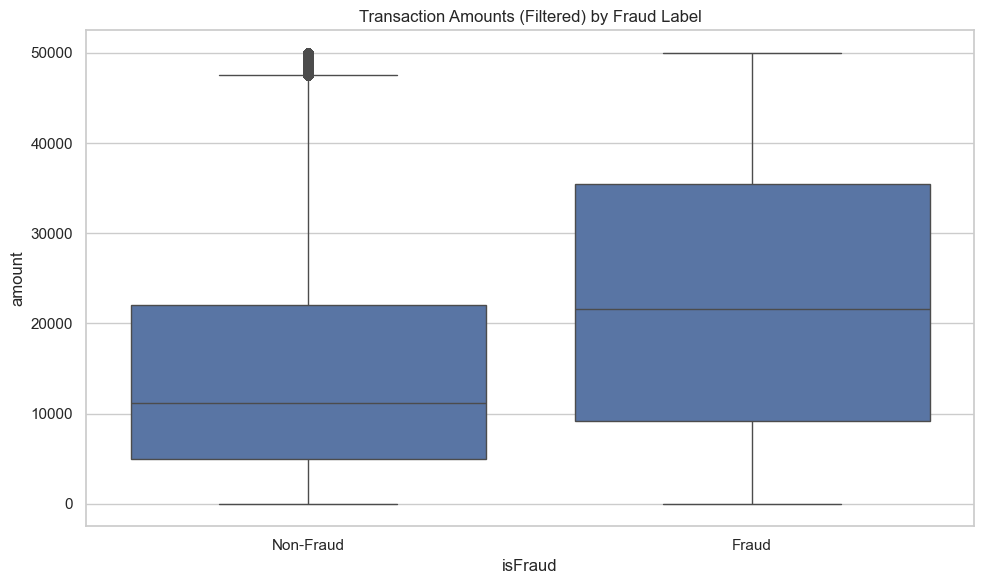

In [59]:
# Boxplot: Amount by Fraud Label
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['amount'] < 50000], x='isFraud', y='amount')
plt.title('Transaction Amounts (Filtered) by Fraud Label')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.tight_layout()
plt.show()

### 4. **Transaction Amounts by Fraud Label (Boxplot)**
- Fraudulent transactions have a **higher median and interquartile range**.
- Non-fraud transactions tend to be smaller and more spread out.

**💡 Fraudsters tend to **target high-value transactions** — consider stricter policies or alerts for transactions above a certain threshold.**

In [60]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'balanceDiffOrig', 'balanceDiffDest'],
      dtype='object')

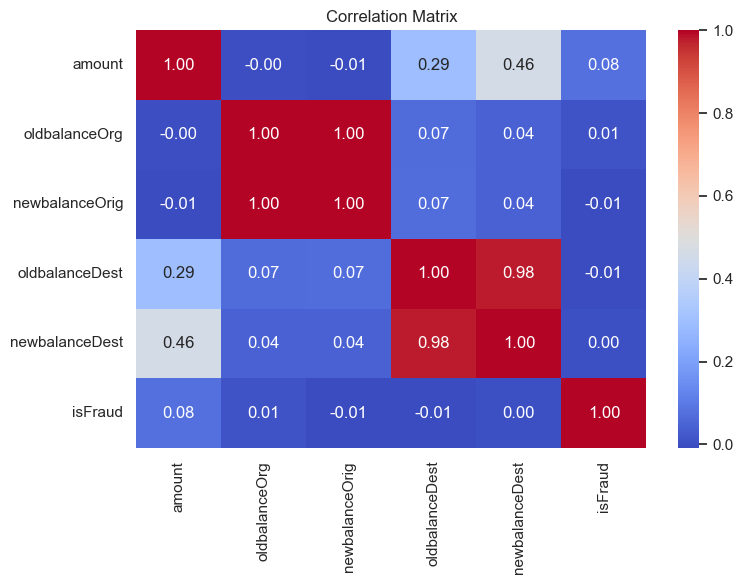

In [61]:
# Correlation Analysis
corr_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']
corr_matrix = df[corr_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

### 5. **Correlation Matrix (Raw Features)**
- `isFraud` has **very weak correlation** with all numerical features.
- High correlation exists only between `oldbalanceDest` and `newbalanceDest`.

**💡 Raw features alone may not be predictive of fraud. **Feature engineering is essential** to uncover meaningful fraud patterns.**

In [62]:
# Fraud Rate
fraud_rate = df['isFraud'].sum() / len(df) * 100
print(f"\n🚨 Fraud Rate in Dataset: {fraud_rate:.4f}%")


🚨 Fraud Rate in Dataset: 0.1291%


In [63]:
# Flagged but not Fraud and vice versa
conf_matrix = pd.crosstab(df['isFraud'], df['isFlaggedFraud'], rownames=['Actual'], colnames=['Flagged'])
print("\n🧾 Confusion Matrix (Actual vs Flagged):")
conf_matrix.head()


🧾 Confusion Matrix (Actual vs Flagged):


Flagged,0,1
Actual,,
0,6354407,0
1,8197,16


In [64]:
# Fraud rate per transaction type: Fraud Proportion per Transaction Type
fraud_by_type = df.groupby('type')['isFraud'].agg(['count', 'sum'])
fraud_by_type['fraud_rate_%'] = (fraud_by_type['sum'] / fraud_by_type['count']) * 100
print("\n🧩 Fraud Rate by Transaction Type:")
print(fraud_by_type.sort_values(by='fraud_rate_%', ascending=False))



🧩 Fraud Rate by Transaction Type:
            count   sum  fraud_rate_%
type                                 
TRANSFER   532909  4097          0.77
CASH_OUT  2237500  4116          0.18
CASH_IN   1399284     0          0.00
DEBIT       41432     0          0.00
PAYMENT   2151495     0          0.00


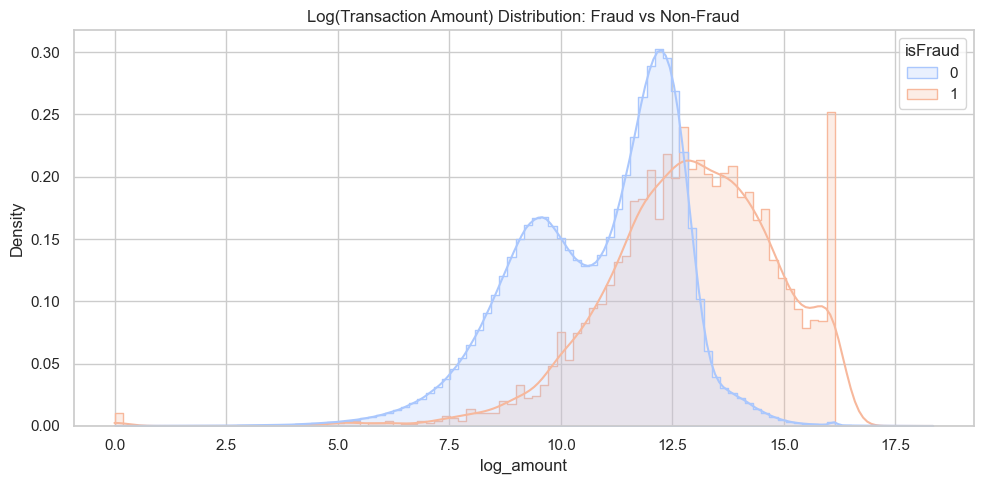

In [65]:

# Log-transform to deal with skew: Amount Distribution (Log Scale for better visibility)
df['log_amount'] = np.log1p(df['amount'])

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='log_amount', hue='isFraud', bins=100, kde=True, palette="coolwarm", element="step", stat="density", common_norm=False)
plt.title('Log(Transaction Amount) Distribution: Fraud vs Non-Fraud')
plt.tight_layout()
plt.show()


### 6. **Log(Transaction Amount) Distribution**
- After log transformation, it’s clear that:
  - Fraudulent transactions are more concentrated in **higher amount ranges**.
  - Non-fraudulent transactions are generally lower in value.

**💡 Applying a log transformation helps **normalize skewed distributions** and enhances visibility into suspicious patterns.**

In [66]:
# Define high value threshold: High-Value Transaction Fraud Rates
high_value_thresh = 200000
high_value_txns = df[df['amount'] > high_value_thresh]

fraud_high_value = high_value_txns['isFraud'].sum()
total_high_value = len(high_value_txns)

print(f"\n💰 High-Value Transactions > {high_value_thresh}:")
print(f"Total: {total_high_value}, Fraudulent: {fraud_high_value} ({(fraud_high_value / total_high_value) * 100:.2f}%)")



💰 High-Value Transactions > 200000:
Total: 1673570, Fraudulent: 5471 (0.33%)


In [67]:
# Fraudulent origin accounts: Repeated Offenders (Customers doing multiple frauds)
fraud_orig_counts = df[df['isFraud'] == 1]['nameOrig'].value_counts()
repeated_frauds = fraud_orig_counts[fraud_orig_counts > 1]

print("\n🔁 Repeat Fraudulent Customers (nameOrig):")
print(repeated_frauds)



🔁 Repeat Fraudulent Customers (nameOrig):
Series([], Name: count, dtype: int64)


In [68]:
#Account Balance Red Flags (Orig = 0 → suspicious)
zero_balance_frauds = df[(df['oldbalanceOrg'] == 0) & (df['newbalanceOrig'] == 0) & (df['isFraud'] == 1)]

print(f"\n🚩 Zero Balance Accounts involved in Fraud: {len(zero_balance_frauds)}")
print(zero_balance_frauds[['type', 'amount', 'nameOrig', 'nameDest']].head())



🚩 Zero Balance Accounts involved in Fraud: 41
            type     amount     nameOrig    nameDest
724     CASH_OUT  416001.33   C749981943  C667346055
14861   CASH_OUT  181728.11  C2102265902  C789014007
25875   TRANSFER 1078013.76  C1026280121  C277510102
77745   CASH_OUT  277970.88   C489647033  C571514738
138559  TRANSFER 1933920.80  C1706582969  C461905695


In [ ]:
# Who tends to initiate fraud more  is it the origins or destinations?
fraud_orig_type = df[df['isFraud'] == 1]['nameOrig'].str.startswith('C').sum()
fraud_dest_type = df[df['isFraud'] == 1]['nameDest'].str.startswith('C').sum()

print(f"Fraud by customer origins: {fraud_orig_type}")
print(f"Fraud by customer destinations: {fraud_dest_type}")


Fraud by customer origins: 8213
Fraud by customer destinations: 8213


In [70]:
# See if money was moved to a destination with 0 balance, i.e., potential drop account
drop_accounts = df[(df['isFraud'] == 1) & (df['oldbalanceDest'] == 0) & (df['newbalanceDest'] == df['amount'])]
print(f"\n🎯 Potential Drop Accounts (fraud + 0 balance before): {len(drop_accounts)}")
print(drop_accounts[['type', 'amount', 'nameOrig', 'nameDest']].head())


🎯 Potential Drop Accounts (fraud + 0 balance before): 1234
          type     amount     nameOrig     nameDest
1911  CASH_OUT  132842.64    C13692003   C297927961
2302  CASH_OUT  235238.66  C1499825229  C2100440237
3060  CASH_OUT 1096187.24    C77163673   C644345897
4104  CASH_OUT   10539.37  C1984954272   C124540047
4261  CASH_OUT   22877.00  C2126545173   C573200870


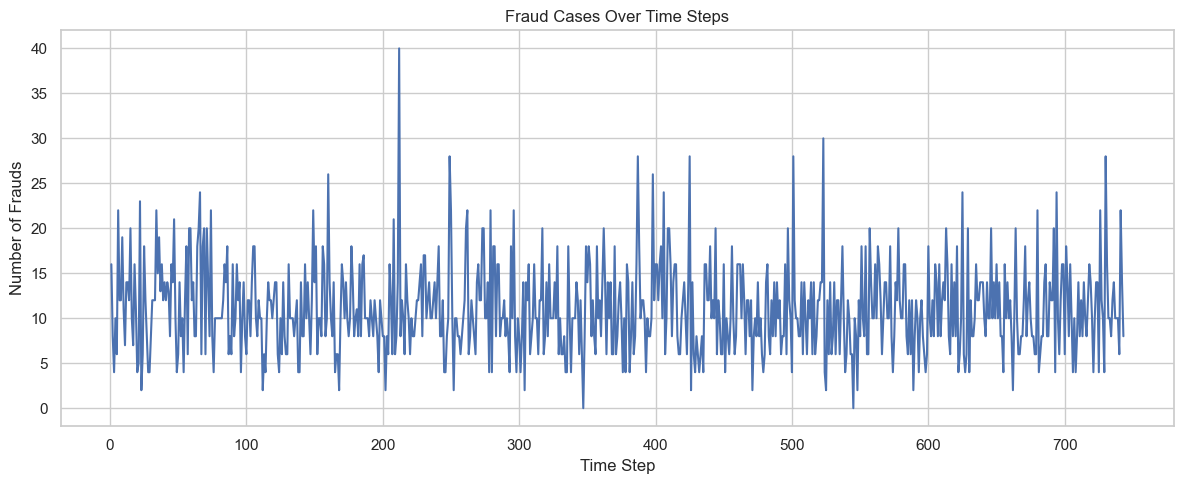

In [71]:
# Patterns based on step
fraud_by_step = df.groupby('step')['isFraud'].sum()

plt.figure(figsize=(12, 5))
sns.lineplot(x=fraud_by_step.index, y=fraud_by_step.values)
plt.title("Fraud Cases Over Time Steps")
plt.xlabel("Time Step")
plt.ylabel("Number of Frauds")
plt.grid(True)
plt.tight_layout()
plt.show()


In [72]:
#  Fraud Rate by Amount Bin
df['amount_bin'] = pd.cut(df['amount'], bins=[0, 100, 1000, 10000, 50000, 100000, 500000, 1000000, 5000000])
fraud_by_amount_bin = df.groupby('amount_bin')['isFraud'].mean() * 100

print("\n📈 Fraud Rate by Amount Bin:")
print(fraud_by_amount_bin.sort_values(ascending=False))



📈 Fraud Rate by Amount Bin:
amount_bin
(1000000, 5000000]   1.65
(500000, 1000000]    0.55
(100000, 500000]     0.11
(50000, 100000]      0.09
(10000, 50000]       0.05
(100, 1000]          0.03
(1000, 10000]        0.02
(0, 100]             0.01
Name: isFraud, dtype: float64


In [73]:
# Top 10 Fraudulent Destination Accounts
fraud_dest_counts = df[df['isFraud'] == 1]['nameDest'].value_counts().head(10)
print("\n📛 Most Targeted Destination Accounts:")
print(fraud_dest_counts)



📛 Most Targeted Destination Accounts:
nameDest
C1193568854    2
C104038589     2
C200064275     2
C1497532505    2
C1601170327    2
C1655359478    2
C2020337583    2
C1653587362    2
C1013511446    2
C2129197098    2
Name: count, dtype: int64


### ✅ Overall EDA Takeaways
| Theme                     | Insight                                                                 |
|---------------------------|-------------------------------------------------------------------------|
| Class Imbalance           | Fraud is rare — impacts model training                                 |
| Transaction Type Focus    | Fraud only occurs in `CASH_OUT` and `TRANSFER`                         |
| Value-Based Risk          | Higher amounts are riskier — fraud tends to involve large transactions |
| Data Quality              | Raw features are not predictive enough on their own                    |
| Engineering Needed        | Derived features (behavioral, balance changes) are crucial             |

In [75]:
#df.to_csv("processed_online_fraud_data.csv", index=False)
print("\n💾 Processed dataset with new features exported as 'processed_fraud_data.csv'")



💾 Processed dataset with new features exported as 'processed_fraud_data.csv'
